# Blending
Blending is an ensemble technique similar to stacking, but simpler in terms of data handling and model combination. It typically involves training different base models on the training data and using their predictions on a holdout set (a small portion of the training data) to train the meta-model. The difference from stacking is that blending doesn’t use cross-validation; instead, it splits the training data into two sets.

- **Base models** are trained on the majority of the training data.
- The **meta-model** is trained on the predictions of the base models on the holdout set.

Blending Classifier:
Accuracy: 0.7
Confusion Matrix:
 [[7 0]
 [6 7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       1.00      0.54      0.70        13

    accuracy                           0.70        20
   macro avg       0.77      0.77      0.70        20
weighted avg       0.84      0.70      0.70        20



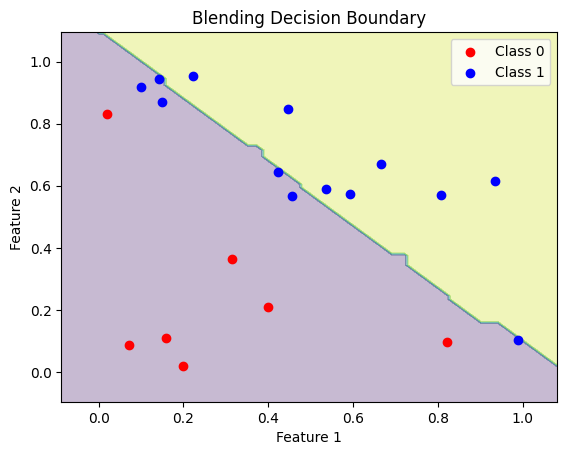

In [2]:
# Blending Classification Notebook

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate synthetic binary classification data
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples with 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Class 1 if the sum of the features is greater than 1

# Split the data into training, blending (holdout), and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_blend, y_train, y_blend = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=0)

# Define base classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = SVC(kernel='linear', probability=True, random_state=0)  # Enable probability=True for soft voting
clf3 = DecisionTreeClassifier(random_state=0)

# Train base classifiers on the main training set
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

# Get base model predictions on the holdout (blending) set
blend_pred_1 = clf1.predict_proba(X_blend)[:, 1]  # Probability of class 1
blend_pred_2 = clf2.predict_proba(X_blend)[:, 1]  # Probability of class 1
blend_pred_3 = clf3.predict_proba(X_blend)[:, 1]  # Probability of class 1

# Stack predictions for the blending dataset
blend_predictions = np.column_stack((blend_pred_1, blend_pred_2, blend_pred_3))

# Train a meta-model (e.g., Logistic Regression) on the predictions of the base models
meta_clf = RandomForestClassifier(random_state=0)
meta_clf.fit(blend_predictions, y_blend)

# Get base model predictions on the test set
test_pred_1 = clf1.predict_proba(X_test)[:, 1]
test_pred_2 = clf2.predict_proba(X_test)[:, 1]
test_pred_3 = clf3.predict_proba(X_test)[:, 1]

# Stack test set predictions
test_predictions = np.column_stack((test_pred_1, test_pred_2, test_pred_3))

# Use the meta-model to predict on the test set
y_pred = meta_clf.predict(test_predictions)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print("Blending Classifier:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualization of decision boundary
# Create a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Get base model predictions on the mesh grid
mesh_grid = np.c_[xx.ravel(), yy.ravel()]
mesh_pred_1 = clf1.predict_proba(mesh_grid)[:, 1]  # Probability of class 1 for Logistic Regression
mesh_pred_2 = clf2.predict_proba(mesh_grid)[:, 1]  # Probability of class 1 for SVC
mesh_pred_3 = clf3.predict_proba(mesh_grid)[:, 1]  # Probability of class 1 for Decision Tree

# Stack the predictions from the base models
mesh_predictions = np.column_stack((mesh_pred_1, mesh_pred_2, mesh_pred_3))

# Use the meta-model to predict on the stacked predictions of the base models
Z = meta_clf.predict(mesh_predictions)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Class 1')
plt.title('Blending Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Explanation of Code Components

1. **Data Splitting**: The data is split into three parts:
   - **Training Set**: Used to train the base models.
   - **Blending Set (Holdout Set)**: Used to train the meta-model. This set acts as a test set for the base models.
   - **Test Set**: Used for the final evaluation.

2. **Base Models**: Three classifiers are used as the base models:
   - **Logistic Regression** (`clf1`)
   - **Support Vector Classifier (SVC)** (`clf2`)
   - **Decision Tree** (`clf3`)

3. **Base Model Predictions**: The base models make predictions (probabilities) on the blending set. These predictions are used to train the meta-model.

4. **Meta-Model**: A **Random Forest** classifier is used as the meta-model. It is trained on the predictions of the base models from the blending set.

5. **Prediction on Test Set**: The test set predictions from the base models are stacked together and passed to the meta-model to make the final prediction.

6. **Evaluation**: The performance of the blending model is evaluated using accuracy, confusion matrix, and classification report.

7. **Visualization**: The decision boundary for the blending classifier is plotted using contour plots.

### Key Points of Blending

- **Simpler Than Stacking**: Blending uses a fixed holdout set (blending set) instead of cross-validation, making it easier to implement but potentially less robust compared to stacking.
- **Base Model Predictions**: The meta-model learns to combine the predictions from the base models rather than directly using the raw input features.
- **Holdout Set**: The holdout set needs to be carefully chosen to ensure that the meta-model has enough data to learn effectively.

### Differences Between Blending and Stacking

- **Cross-Validation**: Stacking typically uses cross-validation to get out-of-fold predictions for the meta-model, while blending uses a single holdout set for predictions.
- **Robustness**: Stacking is generally considered more robust as it reduces the risk of overfitting by using cross-validation.
- **Simplicity**: Blending is simpler to implement because it doesn't require managing cross-validation for out-of-fold predictions.